In [55]:
from commpy.channels import awgn
import numpy as np
import matplotlib.pyplot as plt
import pyMRI.pymri as pymri
import pandas as pd
from pyMRI.utils import RMSE
import seaborn as sns
from typing import Literal

In [56]:
metabolites = pymri.METABOLITES
met_i = 1

t0, tn, dt, B0 = pymri.setup_sim_t(0.0, 1.0, 2048, 3.0)

ws, t2s, M_0s = pymri.unpack_metabolites(metabolites, B0)
ws, t2s, M_0s = ws[met_i - 1:met_i + 1], t2s[met_i - 1:met_i + 1], M_0s[met_i - 1:met_i + 1]
spins_phi = np.zeros_like(M_0s)

rcond = 1e-7 
zero_filtering = 1e-14

print( "All frequencies are captured by the sampling rate." if pymri.check_frequency(ws, dt) == True 
      else f"At least one frequency is NOT captured by the sampling rate")

All frequencies are captured by the sampling rate.


In [57]:
pop = pymri.population(ws, t2s, M_0s, spins_phi)

sig, t = pymri.population_transverse_decay( t0, tn, dt, pop, np.array([]) )
freqs, sig_fft = pymri.fourier_spectrum( sig, dt, B0 )

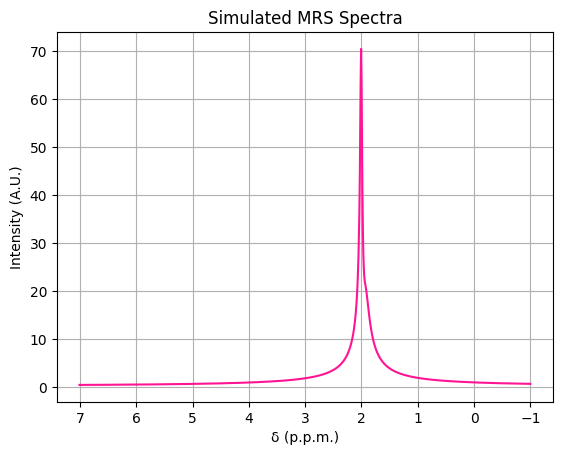

In [58]:
pymri.plot_chem_shifts(freqs, sig_fft, 1.0)

In [59]:
L = 0.4
noise_threshold = 1e-30
L_ = int(L*sig.size)

In [60]:
def rescale(arr : np.ndarray, min : float, max : float):
    return (arr - arr.min()) * (max - min) / (arr.max() - arr.min()) + min

In [61]:
size = 20
offsets = 10**(-(np.linspace(-3, size - 3 - 1, size)))
print(offsets)


[1.e+03 1.e+02 1.e+01 1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06
 1.e-07 1.e-08 1.e-09 1.e-10 1.e-11 1.e-12 1.e-13 1.e-14 1.e-15 1.e-16]


In [62]:
n_avgs = 10
L_ = int(L*2048)
shape = (offsets.size, n_avgs, L_)
s0s_, phis_, omegas_, t2s_ = np.zeros(shape), np.zeros(shape), np.zeros(shape), np.zeros(shape)

In [ ]:
rerun = False
filename_end = "_smaller"
folder_name = "files/"
subfolder_name = "two_peaks/"

In [64]:
if rerun == True:
    for j in range(n_avgs):
        for i in range(offsets.size):
            ws[1] = ws[0] + offsets[i]
            pop = pymri.population(ws, t2s, M_0s, spins_phi)

            sig, t = pymri.population_transverse_decay( t0, tn, dt, pop, np.array([]) )
            # freqs, sig_fft = pymri.fourier_spectrum( sig, dt, B0 )

            f_sig, z, r = pymri.filter_sig(sig, L, noise_threshold, return_poles_and_res=True, return_full_arrays=True)
            s0s_[i, j, :], phis_[i, j, :], omegas_[i, j, :], t2s_[i, j, :] = pymri.calculate_variables_from_z_and_r(z, r, dt)
            t2s_[i, j, :] = 1/t2s_[i, j, :]

In [65]:
avg_s0 = np.average(s0s_, axis=1)
std_s0 = np.std(s0s_, axis=1)

avg_phi = np.average(phis_, axis=1)
std_phi = np.std(phis_, axis=1)

avg_omega = np.average(omegas_, axis=1)
std_omega = np.std(omegas_, axis=1)

avg_t2 = np.average(t2s_, axis=1)
std_t2 = np.std(t2s_, axis=1)

In [66]:
if rerun == True:
    file = open(folder_name + subfolder_name + "peak_1_s0" + filename_end + ".csv", "w")
    file.write(",".join(f'{x:.16f}' for x in offsets) + "\n")
    for i in range(L_):
        file.write(",".join(str(x) for x in avg_s0[:, i]) + "\n")
    file.close()

    file = open(folder_name + subfolder_name + "peak_1_phi" + filename_end + ".csv", "w")
    file.write(",".join(f'{x:.16f}' for x in offsets) + "\n")
    for i in range(L_):
        file.write(",".join(str(x) for x in avg_phi[:, i]) + "\n")
    file.close()

    file = open(folder_name + subfolder_name + "peak_1_omega" + filename_end + ".csv", "w")
    file.write(",".join(f'{x:.16f}' for x in offsets) + "\n")
    for i in range(L_):
        file.write(",".join(str(x) for x in avg_omega[:, i]) + "\n")
    file.close()

    file = open(folder_name + subfolder_name + "peak_1_t2" + filename_end + ".csv", "w")
    file.write(",".join(f'{x:.16f}' for x in offsets) + "\n")
    for i in range(L_):
        file.write(",".join(str(x) for x in avg_t2[:, i]) + "\n")
    file.close()

    file = open(folder_name + subfolder_name + "peak_2_s0" + filename_end + ".csv", "w")
    file.write(",".join(f'{x:.16f}' for x in offsets) + "\n")
    for i in range(L_):
        file.write(",".join(str(x) for x in std_s0[:, i]) + "\n")
    file.close()

    file = open(folder_name + subfolder_name + "peak_2_phi" + filename_end + ".csv", "w")
    file.write(",".join(f'{x:.16f}' for x in offsets) + "\n")
    for i in range(L_):
        file.write(",".join(str(x) for x in std_phi[:, i]) + "\n")
    file.close()

    file = open(folder_name + subfolder_name + "peak_2_omega" + filename_end + ".csv", "w")
    file.write(",".join(f'{x:.16f}' for x in offsets) + "\n")
    for i in range(L_):
        file.write(",".join(str(x) for x in std_omega[:, i]) + "\n")
    file.close()

    file = open(folder_name + subfolder_name + "peak_2_t2" + filename_end + ".csv", "w")
    file.write(",".join(f'{x:.16f}' for x in offsets) + "\n")
    for i in range(L_):
        file.write(",".join(str(x) for x in std_t2[:, i]) + "\n")
    file.close()

In [67]:
if rerun == False:
    file_in = pd.read_csv(folder_name + subfolder_name + "peak_1_s0" + filename_end + ".csv")
    offsets = file_in.keys().to_numpy(dtype=np.float64)
    avg_s0= file_in.values
    avg_s0 = avg_s0.T

    file_in = pd.read_csv(folder_name + subfolder_name + "peak_1_phi" + filename_end + ".csv")
    avg_phi = file_in.values
    avg_phi = avg_phi.T

    file_in = pd.read_csv(folder_name + subfolder_name + "peak_1_omega" + filename_end + ".csv")
    avg_omega = file_in.values
    avg_omega = avg_omega.T

    file_in = pd.read_csv(folder_name + subfolder_name + "peak_1_t2" + filename_end + ".csv")
    avg_t2 = file_in.values
    avg_t2 = avg_t2.T

    file_in = pd.read_csv(folder_name + subfolder_name + "peak_2_s0" + filename_end + ".csv")
    std_s0 = file_in.values
    std_s0 = std_s0.T

    file_in = pd.read_csv(folder_name + subfolder_name + "peak_2_phi" + filename_end + ".csv")
    std_phi = file_in.values
    std_phi = std_phi.T

    file_in = pd.read_csv(folder_name + subfolder_name + "peak_2_omega" + filename_end + ".csv")
    std_omega = file_in.values
    std_omega = std_omega.T

    file_in = pd.read_csv(folder_name + subfolder_name + "peak_2_t2" + filename_end + ".csv")
    std_t2 = file_in.values
    std_t2 = std_t2.T

In [68]:
print(avg_omega.shape)
print(avg_s0.shape)

(20, 819)
(20, 819)


In [74]:
args = np.argsort(avg_s0, axis=1)
# print(args.shape)

i = 0

identified_s0 = np.sort(avg_s0[i, args[i, :]][L_ - 2: L_]) #filtra apenas os dois ultimos, correspondentes aos dois ultimos picos
identified_omega = np.sort(avg_omega[i, args[i, :]][L_ - 2: L_])
identified_phi = np.sort(avg_phi[i, args[i, :]][L_ - 2: L_])
identified_t2 = np.sort(avg_t2[i, args[i, :]][L_ - 2: L_])

print("Original")
print(np.sort(np.array([ws[0], ws[0] + offsets[i]])))
print("Identificado")
print(identified_omega)
# print(avg_s0[i, args[i, :]][L_ - 2: L_])
print(offsets[i])

Original
[2355.21183064 3355.21183064]
Identificado
[2355.21183064 3355.21183064]
1000.0


Acima, é possível perceber que o limite de identificação de picos esbarra em 0.1Hz. Uma tese para esse limite é que a resolução da simulação é uma barreira: O sinal tem 2048 pontos, coletados no intervalo de tempo de 1s, o que da uma resolução de [-2048/2, 2048/2] Hz. Essas características configuram ao sinal resolução de 1Hz por ponto, perto da barreira a qual a identificação começa a falhar. Aparentemente o limite do algoritmo é a resolução do sinal.

In [75]:
identified_pop = pymri.population(identified_omega, identified_t2, identified_s0, identified_phi)

identified_sig, t = pymri.population_transverse_decay( t0, tn, dt, identified_pop, np.array([]) )
_, identified_sig_fft = pymri.fourier_spectrum(identified_sig, dt, B0)

([], [])

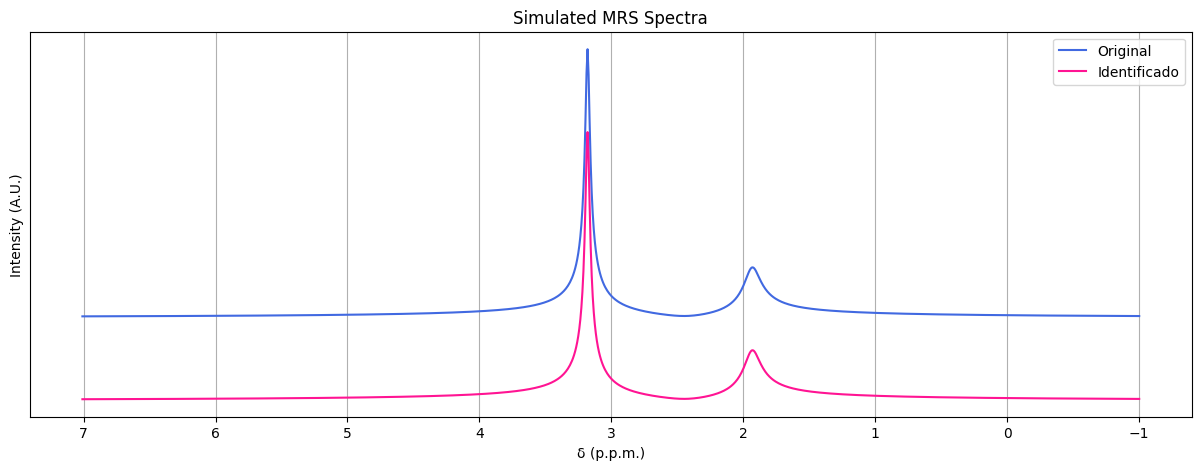

In [76]:
ws[1] = ws[0] + offsets[i]
pop = pymri.population(ws, t2s, M_0s, spins_phi)

sig, t = pymri.population_transverse_decay( t0, tn, dt, pop, np.array([]) )
freqs, sig_fft = pymri.fourier_spectrum(sig, dt, B0)

y_offset = 10.0

plt.figure(figsize=(15, 5))
pymri.plot_chem_shifts(freqs, sig_fft, 1.0, y_offset=3*y_offset, label="Original", c = "royalblue")
pymri.plot_chem_shifts(freqs, identified_sig_fft, 1.0, y_offset=y_offset, label="Identificado")
plt.legend()
plt.yticks([])

In [77]:
k = np.arange(0, L_, 1, dtype = int)

# plt.plot(k, avg_omega[:, 7])